In [12]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import myfuncions.tools_f as tools
import myfuncions.sandwichmachine_f as sand
import subprocess as sbp
from os import remove


name='Pt_0.6_cs.xyz'
try: 
    remove(name)
except:
    pass
coords = cs.cubeShell(15,2.775,'fcc')
coords = cs.sphericalShave(coords,15.3)

cs.tomakeshell_wxyz(coords,'Pt',name)

atpos, eleList = tools.leer_xyz(name)
atpos= sand.capas(atpos,13.1,17,'Ni')
eleList = ['Pt','Ni']
tools.show_percent(atpos,eleList)
tools.wXYZ(atpos,name)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

atomos totales : 976
Pt : 62.5 %, 610
Ni : 37.5 %, 366


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'Pt_0.6_cs.xyz'], returncode=0)

In [13]:
from myfuncions.lammpin_f import wlammpin
wlammpin(atpos,eleList,name)

Pt_0.6_cs.ini


In [14]:

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library.meam Pt Ni ..\\..\\LAMMPS\\PtNiV2.pot Pt Ni 
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cambia etiquetas a "atpos"
jala


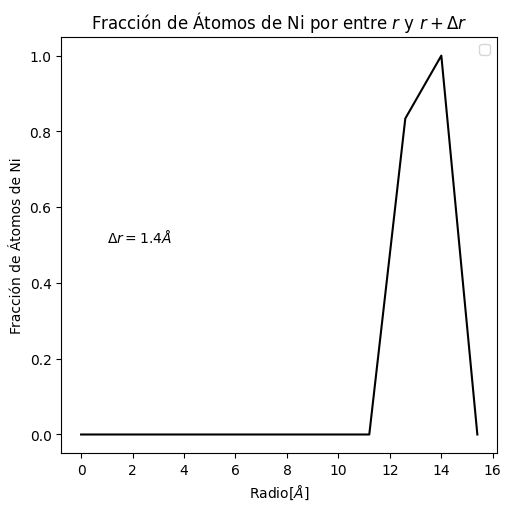

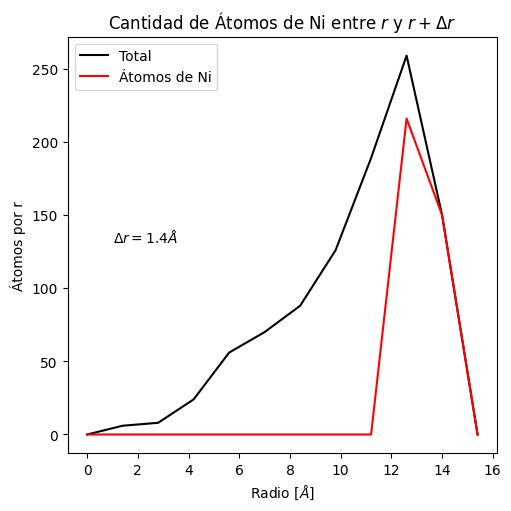

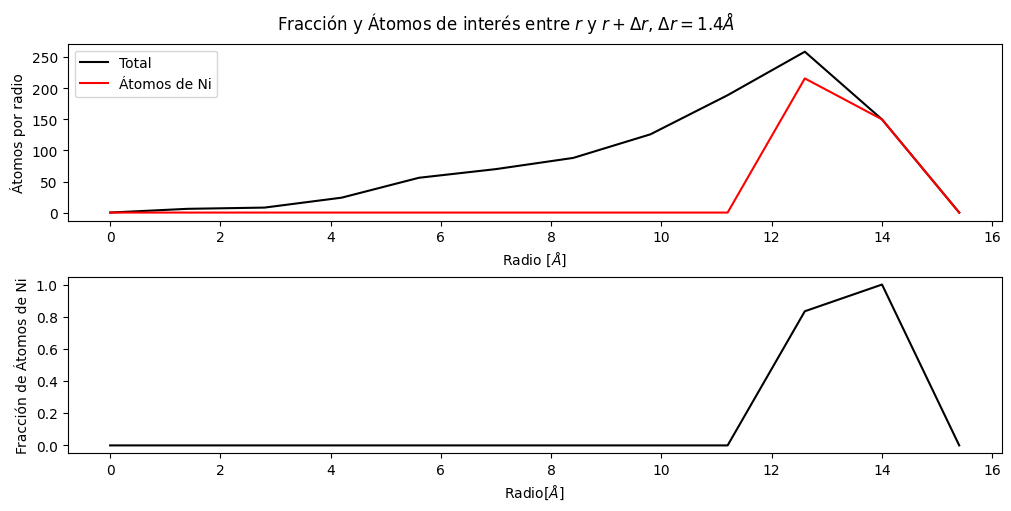

In [15]:
import myfuncions.graphs_f as gf
datpos, deleList = tools.leer_xyz(f'{name[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Ni', 2: 'Pt'})

gf.dump_graficar_fracc_atpr(datpos,'Ni',1.4)
gf.dump_graficar_atpr(datpos,'Ni',1.4)
gf.plot_dump_f_y_atpr(datpos,'Ni',1.4)

In [16]:
tools.wXYZ(datpos,f'{name[:-4]}_d.xyz')

sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}_d.xyz'])

CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'Pt_0.6_cs_d.xyz'], returncode=0)

In [17]:
import PDF.runner as pdf
pdf.run_pdf(f'{name[:-4]}_d.xyz', dir_actual, 1700,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\03_01_2025_sandwich_coreshell_janus_notebooks\NCsPt_0.6

  -2.14988995      -6.39233017      -12.3709002              28   57828.0000    
   2.38562012      -6.13492012      -12.2721996              28   57828.0000    
  -6.33993006      -1.72668004      -13.0441999              28   57828.0000    
         976  atomos       475800  pares 
 Rango de distancias    2.04315424     -   29.7181835    
 Distancias promedio    15.5023537    
 Factor de normalizacion    37431.8320    



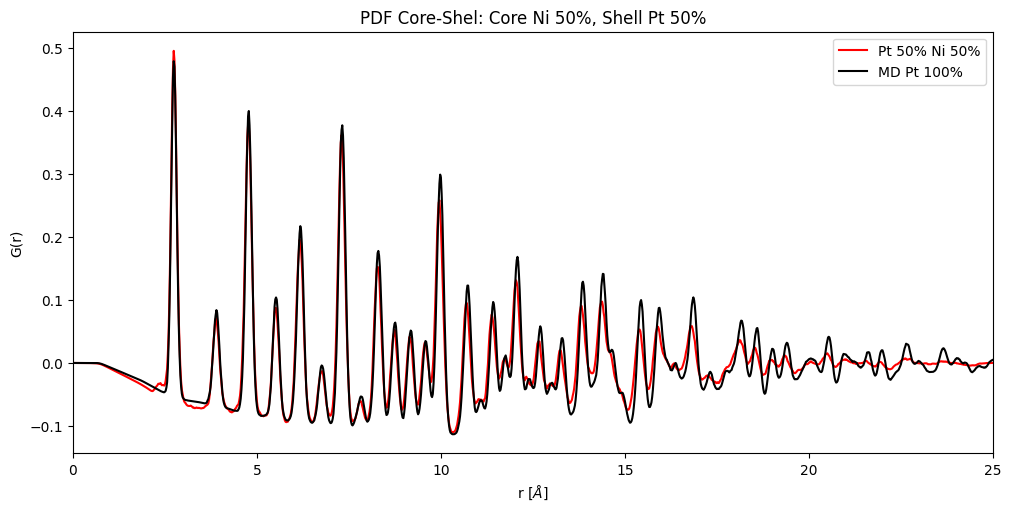

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df_FCC= pd.read_csv(f'{name[:-4]}_d.txt', sep='\s+')
df_ref = pd.read_csv('C:/Users/guill/OneDrive/Documentos/Tesis/Proyect/03_15_2024_Pt_Ni_rand_dist/Pt_100/Pt-FCC_d.txt', sep = '\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], label=f'Pt 50% Ni 50%', color = 'red')
ax.plot(df_ref['#r(A)'],df_ref['G(r)'], label = 'MD Pt 100%', color = 'black')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,25])
ax.set_ylabel('G(r)')
ax.set_title('PDF Core-Shel: Core Ni 50%, Shell Pt 50%')
#ax.grid('True', linestyle='-')
ax.legend()
plt.show()

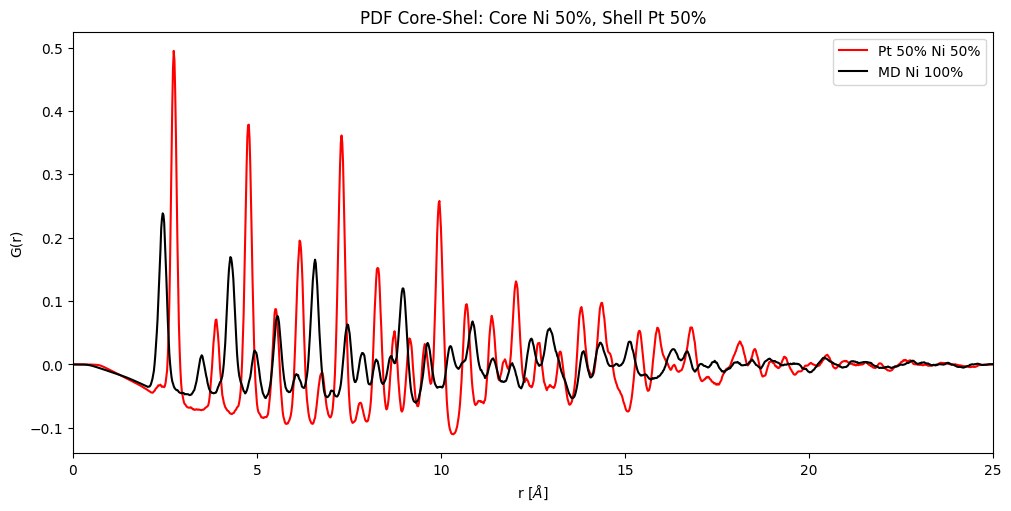

In [19]:
df_FCC= pd.read_csv(f'{name[:-4]}_d.txt', sep='\s+')
df_ref = pd.read_csv('C:/Users/guill/OneDrive/Documentos/Tesis/Proyect/03_15_2024_Pt_Ni_rand_dist/Ni_100/Ni-FCC_d.txt', sep = '\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], label=f'Pt 50% Ni 50%', color = 'red')
ax.plot(df_ref['#r(A)'],df_ref['G(r)'], label = 'MD Ni 100%', color = 'black')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,25])
ax.set_ylabel('G(r)')
ax.set_title('PDF Core-Shel: Core Ni 50%, Shell Pt 50%')
#ax.grid('True', linestyle='-')
ax.legend()
plt.show()